In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

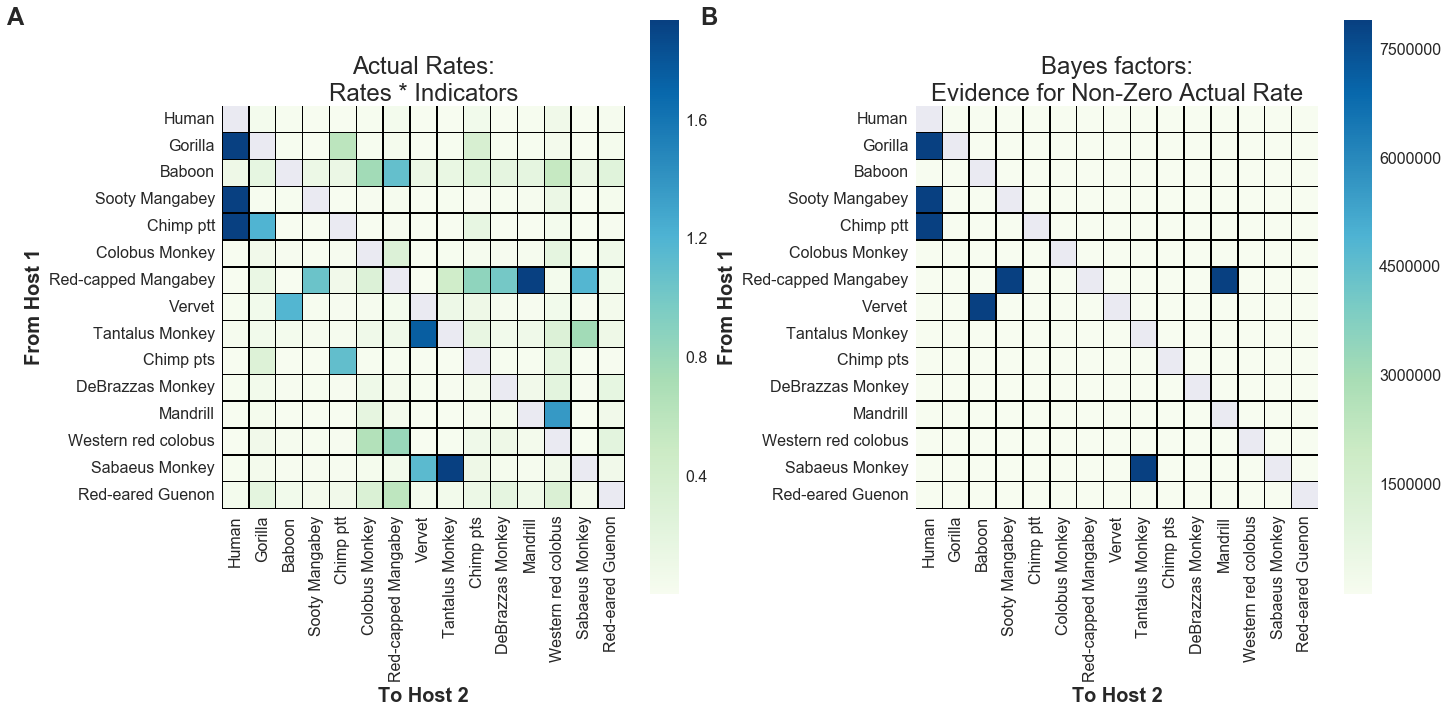

In [2]:
actualRates = pd.read_csv('../../beast/supplement/discreteTraits/results/discreteTraits_2016-12-27_actualRates.csv', index_col=0, header=0)
bayesFactors = pd.read_csv('../../beast/supplement/discreteTraits/results/discreteTraits_2016-12-27_bf.csv', index_col=0, header=0)

rename = { i: i.replace('_', ' ') for i in actualRates.columns.values }
actualRates.rename(columns = rename, index = rename, inplace=True)
bayesFactors.rename(columns = rename, index = rename, inplace=True)
bayesFactors = bayesFactors.applymap(lambda x: x / 12.0)

fig, (ar_ax, bf_ax) = plt.subplots(figsize=(20, 10),nrows=1,ncols=2,facecolor='w')

ar_heatmap = sns.heatmap(actualRates, cmap = plt.cm.GnBu, square = True, #annot=True,
                         linecolor = 'black', robust=True, linewidths = 0.5, ax=ar_ax)

bf_heatmap = sns.heatmap(bayesFactors, cmap = plt.cm.GnBu, square = True, #annot=True,
                         linecolor = 'black', robust=True, linewidths = 0.5, ax=bf_ax, vmin=3.0)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
cax2=plt.gcf().axes[2]
cax2.tick_params(labelsize=16)
for label in ar_ax.get_yticklabels() + ar_ax.get_xticklabels() + bf_ax.get_xticklabels() + bf_ax.get_yticklabels():
        label.set_size(16)

ar_ax.set_title('Actual Rates:\nRates * Indicators', fontsize=24)
ar_ax.set_ylabel('From Host 1', fontsize=20, va='bottom',fontweight='bold')
ar_ax.set_xlabel('To Host 2', fontsize=20, va='top',fontweight='bold')
bf_ax.set_title('Bayes factors:\nEvidence for Non-Zero Actual Rate', fontsize=24)

bf_ax.set_ylabel('From Host 1', fontsize=20, va='bottom',fontweight='bold')
bf_ax.set_xlabel('To Host 2', fontsize=20, va='top',fontweight='bold')

ar_ax.text(-8, 18, 'A', fontsize=24, fontweight='bold')
bf_ax.text(-8, 18, 'B', fontsize=24, fontweight='bold')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('FigS4_AR_BF_H24.png', dpi=300, bbox_inches='tight')
plt.show()

### Figure S4: Actual rates and Bayes factors for supplemental dataset discrete trait analyses  
Values for the asymmetric transition rates between hosts, as estimated by the CTMC, were calculated as rate * indicator (element-wise for each state logged). We report the average posterior values above. Bayes factors represent a ratio of the posterior odds / prior odds that a given actual rate is non-zero. Because each of the 12 segments contributes to the likelihood, but they have not evolved independently, we divide all Bayes factors by 12 and report the adjusted values above (and throughout the text). 